In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [20]:
#import file
file_path = 'ecommerce_sales_data.csv'
df = pd.read_csv(file_path, parse_dates=['Order_Date'],dayfirst=True)

In [5]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
  Order_ID Customer_ID Order_Date     Month Product_Category   Product_Name  \
0    O2898        C697 2024-12-22  December             Toys  Action Figure   
1    O8994        C697 2024-07-31      July            Books      Biography   
2    O1892        C577 2024-05-20       May            Books          Novel   
3    O8825        C800 2024-03-02     March        Groceries         Coffee   
4    O8585        C961 2024-10-26   October             Toys  Action Figure   

   Quantity  Price_per_Item  Total_Sale Region  
0         4           58.38      233.52  North  
1         3          225.43      676.29  North  
2         3          198.79      596.37  North  
3         2          484.02      968.04   West  
4         3          405.52     1216.56   East  


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Order_ID            0
Customer_ID         0
Order_Date          0
Month               0
Product_Category    0
Product_Name        0
Quantity            0
Price_per_Item      0
Total_Sale          0
Region              0
dtype: int64


In [7]:
#handling missing value
df.fillna(method='ffill', inplace=True)
print("\nMissing Values after handling:")
print(df.isnull().sum())


Missing Values after handling:
Order_ID            0
Customer_ID         0
Order_Date          0
Month               0
Product_Category    0
Product_Name        0
Quantity            0
Price_per_Item      0
Total_Sale          0
Region              0
dtype: int64


In [8]:
df.drop_duplicates(inplace=True)

# Exploratory data analysis

In [9]:
#Descriptive statistics
print("\nDescriptive statistics :")
print(df.describe(include='all'))


Descriptive statistics :
       Order_ID Customer_ID                  Order_Date  Month  \
count       500         500                         500    500   
unique      487         382                         NaN     12   
top       O4797        C887                         NaN  March   
freq          2           4                         NaN     51   
mean        NaN         NaN  2024-07-01 08:55:40.800000    NaN   
min         NaN         NaN         2024-01-01 00:00:00    NaN   
25%         NaN         NaN         2024-04-03 00:00:00    NaN   
50%         NaN         NaN         2024-06-29 12:00:00    NaN   
75%         NaN         NaN         2024-09-26 06:00:00    NaN   
max         NaN         NaN         2024-12-29 00:00:00    NaN   
std         NaN         NaN                         NaN    NaN   

       Product_Category Product_Name    Quantity  Price_per_Item   Total_Sale  \
count               500          500  500.000000      500.000000   500.000000   
unique             

In [10]:
#check for unique values in category column
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Order_ID:
Order_ID
O4797    2
O7425    2
O2552    2
O7570    2
O5242    2
        ..
O5884    1
O9692    1
O8828    1
O4127    1
O2574    1
Name: count, Length: 487, dtype: int64

Unique values in Customer_ID:
Customer_ID
C887    4
C355    4
C655    3
C602    3
C796    3
       ..
C354    1
C732    1
C725    1
C609    1
C134    1
Name: count, Length: 382, dtype: int64

Unique values in Month:
Month
March        51
May          50
July         47
October      43
April        42
September    41
December     40
August       40
June         39
November     37
January      35
February     35
Name: count, dtype: int64

Unique values in Product_Category:
Product_Category
Home           92
Groceries      90
Clothing       88
Toys           80
Books          75
Electronics    75
Name: count, dtype: int64

Unique values in Product_Name:
Product_Name
Coffee           29
Jacket           27
Sofa             27
Shirt            26
Vacuum           25
Novel            25
Tea       

# Visualizations

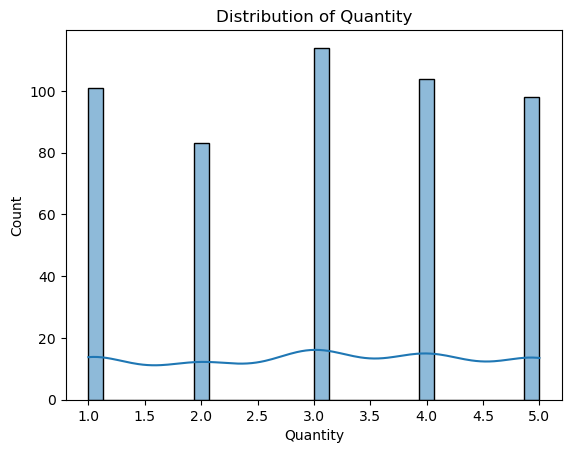

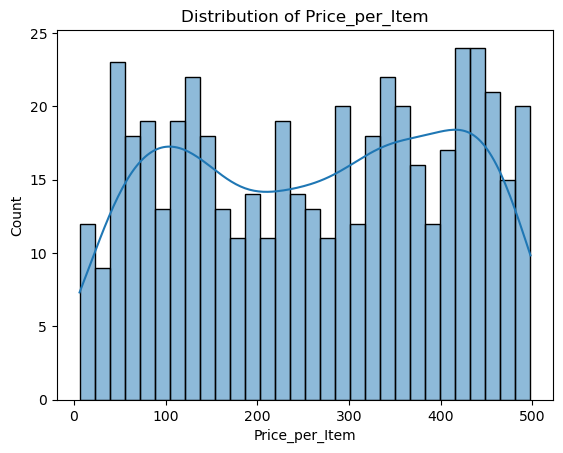

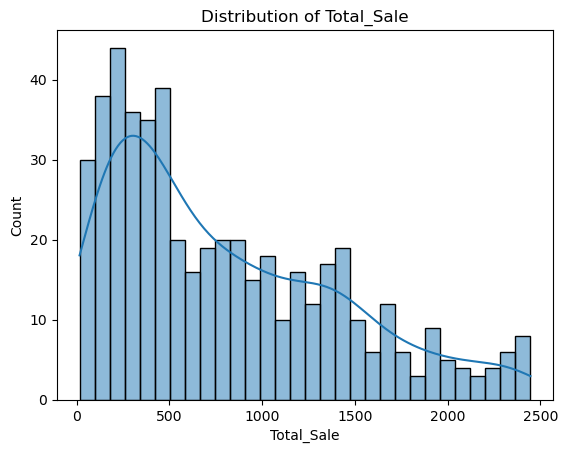

In [11]:
#distibution of numeric column
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in  num_cols:
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

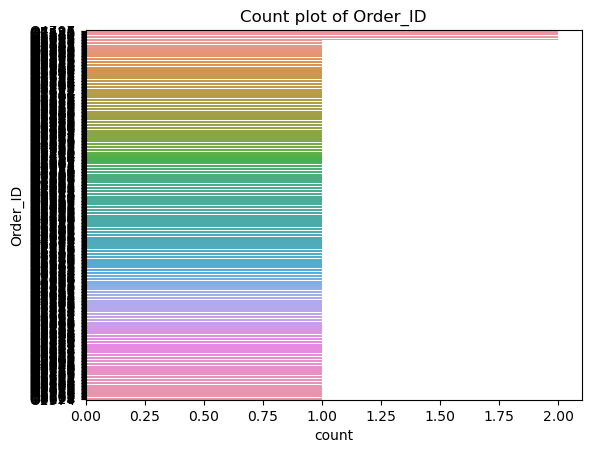

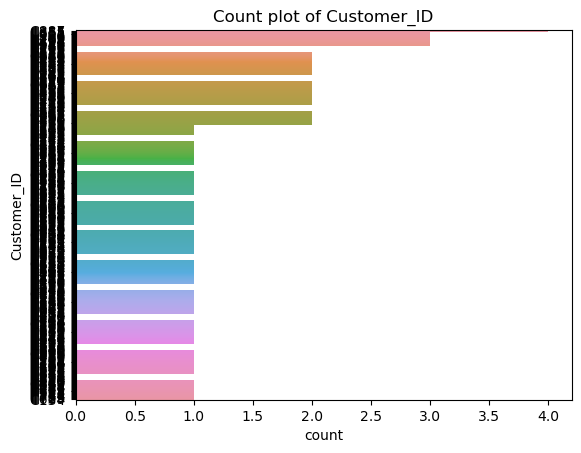

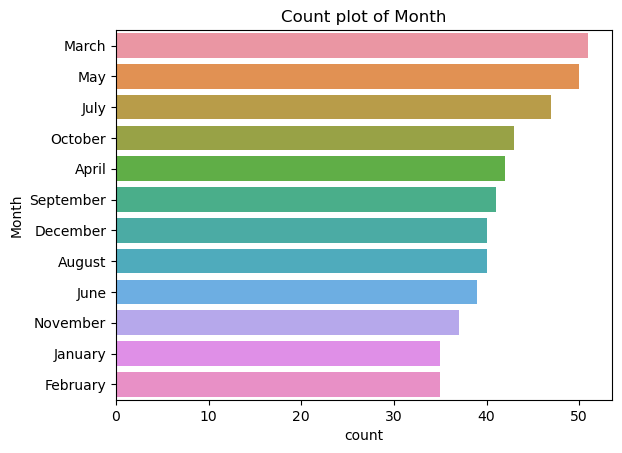

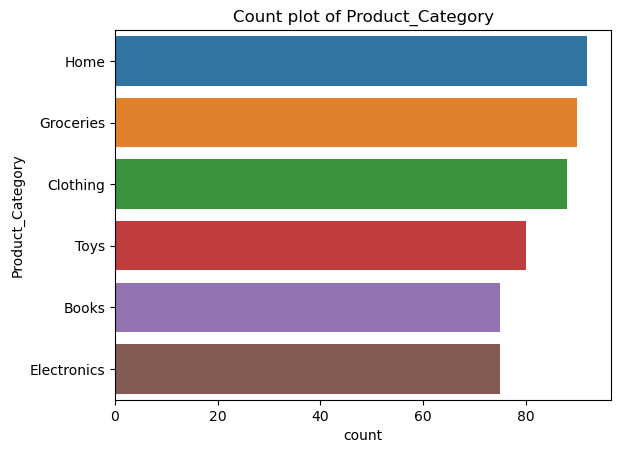

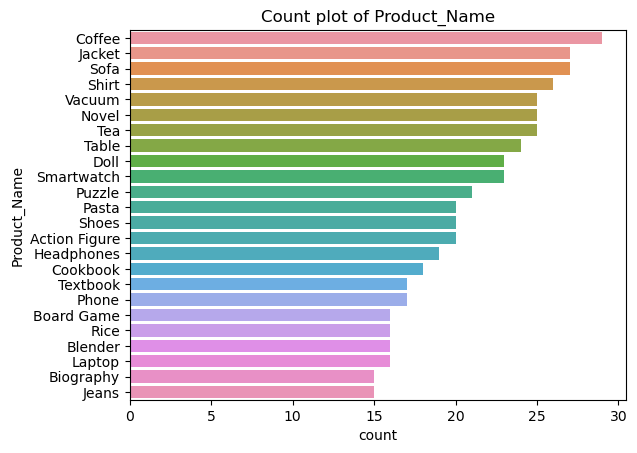

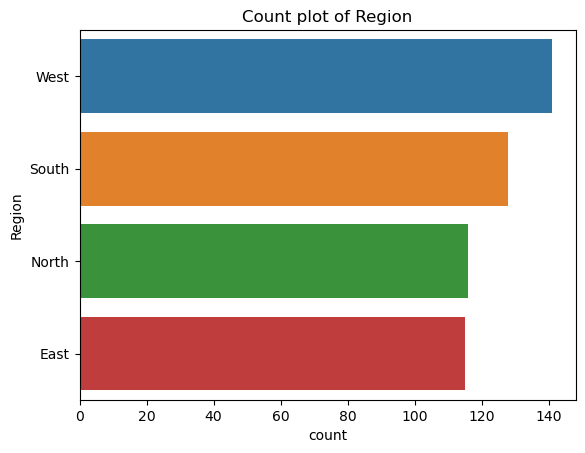

In [12]:
#Count plot for categorical column
for col in  categorical_cols:
    sns.countplot(y=col, data = df,order=df[col].value_counts().index)
    plt.title(f'Count plot of {col}')
    plt.show()

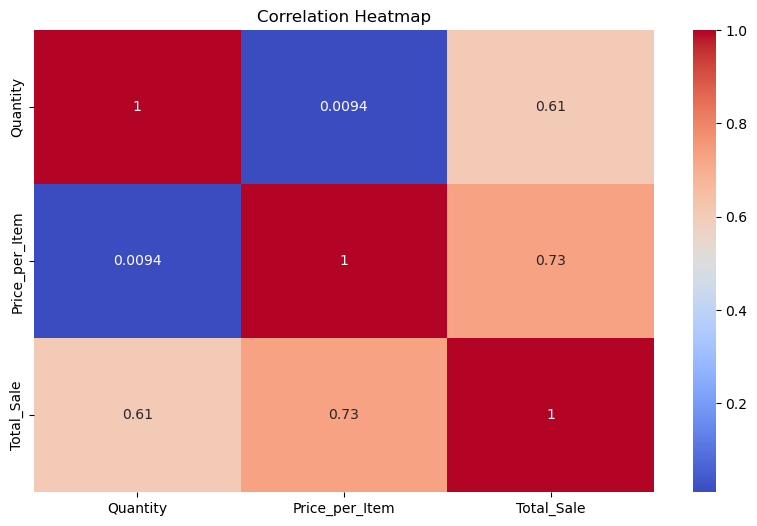

In [13]:
#correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Insight

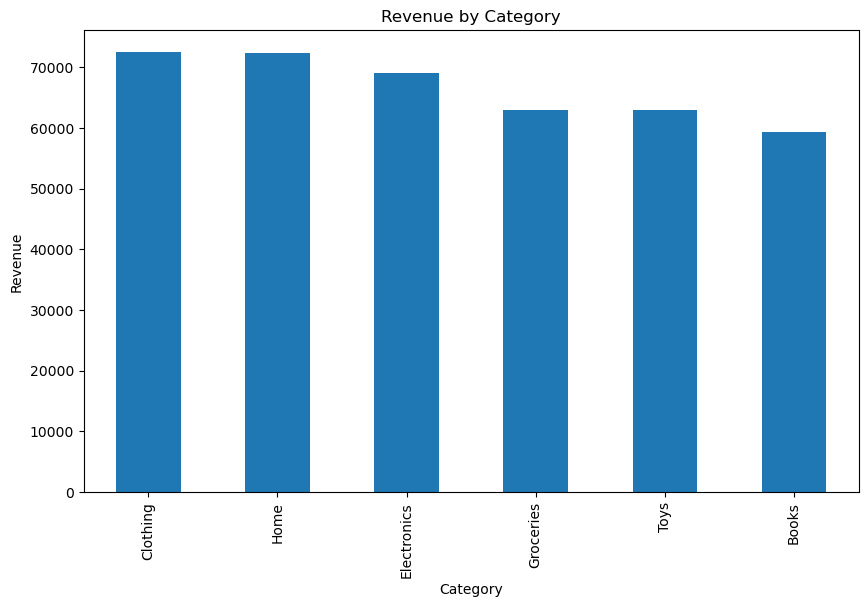

In [14]:
#Top categories by revenue
if 'Product_Category' in df.columns and 'Total_Sale' in df.columns:
    revenue_by_category = df.groupby('Product_Category')['Total_Sale'].sum().sort_values(ascending=False)
    revenue_by_category.plot(kind='bar',figsize=(10, 6))
    plt.title('Revenue by Category')
    plt.ylabel('Revenue')
    plt.xlabel('Category')
    plt.show()


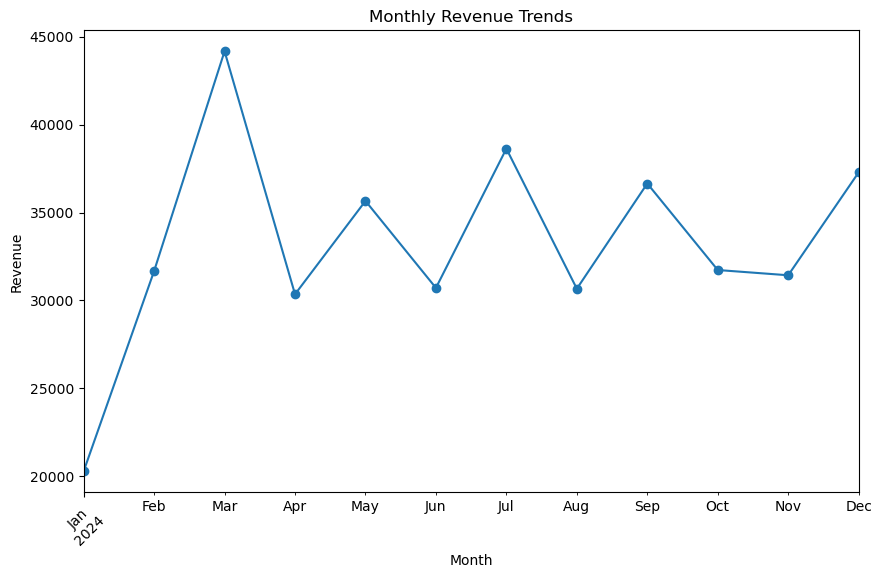

In [16]:
#Monthly trend
if 'Order_Date' in df.columns:
    df['Order_Date']= pd.to_datetime(df['Order_Date'])
    df['Month']=df['Order_Date'].dt.to_period('M')
    monthly_revenue = df.groupby('Month')['Total_Sale'].sum()
    monthly_revenue.plot(kind='line', marker='o',figsize=(10, 6))
    plt.title('Monthly Revenue Trends')
    plt.ylabel('Revenue')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.show()

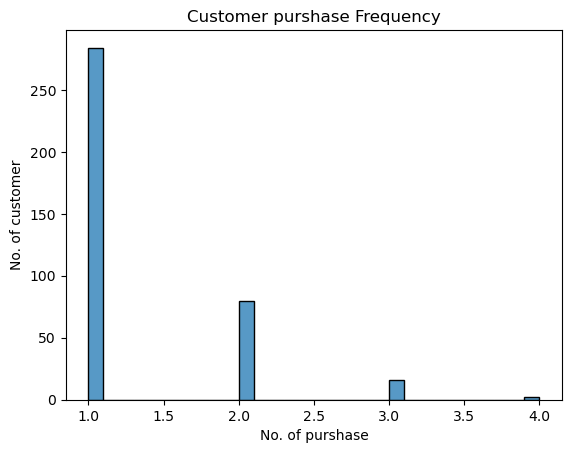

In [17]:
if 'Customer_ID' in df.columns:
    customer_purchases = df['Customer_ID'].value_counts()
    sns.histplot(customer_purchases,bins=30 ,kde=False)
    plt.title('Customer purshase Frequency')
    plt.ylabel('No. of customer')
    plt.xlabel('No. of purshase')
    plt.show()

# Conclusion

In [18]:
#key finding
print("Key Insights: ")
if 'Total_Sale' in df.columns:
    print(f"Total_Sale :{df['Total_Sale'].sum()}")
    print(f"Average revenue per order :{df['Total_Sale'].mean()}")
    
if 'Product_Category' in df.columns:
    print("\nTop 3 Categories by Revenue")
    print(revenue_by_category.head(3))  
    
if 'Order_Date' in df.columns:
    print("\nMonth with Highest Revenue")
    print(monthly_revenue.nlargest(1))

Key Insights: 
Total_Sale :399241.56
Average revenue per order :798.48312

Top 3 Categories by Revenue
Product_Category
Clothing       72493.71
Home           72388.06
Electronics    69071.27
Name: Total_Sale, dtype: float64

Month with Highest Revenue
Month
2024-03    44182.65
Freq: M, Name: Total_Sale, dtype: float64


In [19]:
# Actionable insights
print("\nRecommendations:")
print("- Focus on top-performing categories to maximize revenue.")
print("- Consider promotions during low-revenue months.")
print("- Engage high-frequency customers with loyalty programs.")


Recommendations:
- Focus on top-performing categories to maximize revenue.
- Consider promotions during low-revenue months.
- Engage high-frequency customers with loyalty programs.
